### Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

bank_train = pd.read_csv("/Users/antran/Google Drive/USD_Teaching/ADS-502/WebsiteDataSets/bank_marketing_training.csv")

The first step in creating a bar graph is to create a contingency table of the
values in the predictor and target variables

In [2]:
crosstab_01 = pd.crosstab(bank_train['previous_outcome'], bank_train['response'])

In [3]:
crosstab_01

response,no,yes
previous_outcome,,
failure,2390,385
nonexistent,21176,2034
success,320,569


Now, we can create the bar graph based on the table. Create the bar graph based on the table

<AxesSubplot:xlabel='previous_outcome'>

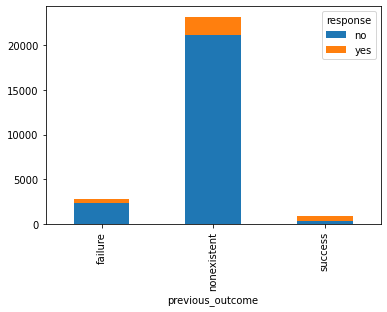

In [4]:
crosstab_01.plot(kind='bar', stacked = True)

To create a normalized version, need to change the table so that the values
in each cell are the proportions of `no` and `yes` response values within each value of the predictor `previous_outcome`

In [5]:
crosstab_norm = crosstab_01.div(crosstab_01.sum(axis=1), axis = 0)

Visualize it using a stacked bar chart

<AxesSubplot:xlabel='previous_outcome'>

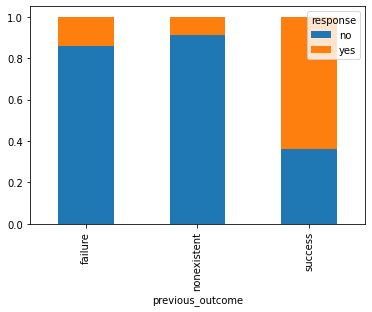

In [6]:
crosstab_norm.plot(kind='bar', stacked = True)

### Binning

In [7]:
age_y = bank_train[bank_train.response == "yes"]['age']
age_n = bank_train[bank_train.response == "no"]['age']

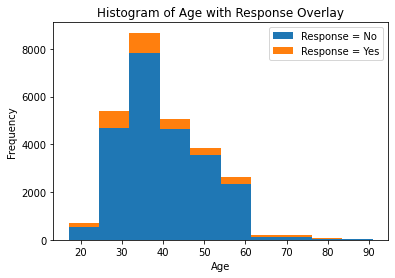

In [8]:
plt.hist([age_n, age_y], bins = 10, stacked = True)
plt.legend(['Response = No', 'Response = Yes'])
plt.title('Histogram of Age with Response Overlay')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Bin the values using `cut(`) from the `pandas` package

In [9]:
bank_train['age_binned'] = pd.cut(x = bank_train['age'],
                                  bins = [0, 25, 60, 100],
                                  labels=["Under 25", "25 to 60", "Over 60"])

Graph the binning with an overlay of response, create the necessary
contingency table and plot it

<AxesSubplot:title={'center':'Bar Graph of Age (Binned) with Response Overlay'}, xlabel='age_binned'>

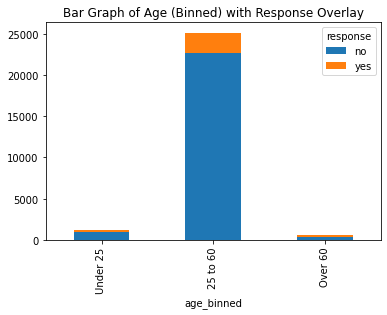

In [10]:
crosstab_02 = pd.crosstab(bank_train['age_binned'],bank_train['response'])
crosstab_02.plot(kind='bar', stacked = True, title = 'Bar Graph of Age (Binned) with Response Overlay')

Normalized bar graph

<AxesSubplot:title={'center':'Bar Graph of Age (Binned) with Response Overlay'}, xlabel='age_binned'>

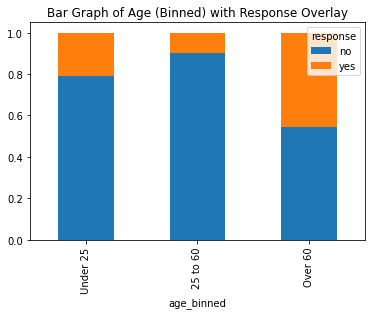

In [11]:
crosstab_02 = pd.crosstab(bank_train['age_binned'], bank_train['response'])
crosstab_norm = crosstab_02.div(crosstab_02.sum(axis=1), axis=0)
crosstab_norm.plot(kind='bar', stacked = True, title = 'Bar Graph of Age (Binned) with Response Overlay')

### Decision Trees

In [12]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

adult_tr = pd.read_csv("/Users/antran/Google Drive/USD_Teaching/ADS-502/WebsiteDataSets/adult_ch6_training.csv")

For simplicity, only 2 predictors and the target are retained: Marital status, Cap_gains_losses, Income.

* Marital status: single, married, devorced...
* Cap_gains_losses: capital gains and loss of an individual

In [13]:
X = adult_tr[['Marital status', 'Cap_Gains_Losses']]

For convenience, we save the `Income` variable as `y`.

*  50k<
*  <=50k

In [14]:
y = adult_tr[['Income']]

In [15]:
y

,Income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
18756,<=50K
18757,<=50K
18758,<=50K
18759,<=50K


We have a categorical variable, `Marital status`, among our predictors. The
decision tree model implemented in the `sklearn` package needs categorical variables converted to a dummy variable form. Thus, we will need to dummy encode our `Marital status` variable.

In [16]:
X['Marital status']

0        Never-married
1             Divorced
2              Married
3              Married
4              Married
             ...      
18756         Divorced
18757          Married
18758          Married
18759         Divorced
18760          Married
Name: Marital status, Length: 18761, dtype: object

In [17]:
mar_dummy = pd.get_dummies(X['Marital status'])

In [18]:
mar_dummy

,Divorced,Married,Never-married,Separated,Widowed
0,0,0,1,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
18756,1,0,0,0,0
18757,0,1,0,0,0
18758,0,1,0,0,0
18759,1,0,0,0,0


Now, we need to add the newly made dummy variables back into the X variables.

In [19]:
X = pd.concat((X[['Cap_Gains_Losses']], mar_dummy), axis = 1) # axis=1: column-wise concatenation

In [20]:
X

,Cap_Gains_Losses,Divorced,Married,Never-married,Separated,Widowed
0,0.02174,0,0,1,0,0
1,0.00000,1,0,0,0,0
2,0.00000,0,1,0,0,0
3,0.00000,0,1,0,0,0
4,0.00000,0,1,0,0,0
...,...,...,...,...,...,...
18756,0.00000,1,0,0,0,0
18757,0.00000,0,1,0,0,0
18758,0.00000,0,1,0,0,0
18759,0.00000,1,0,0,0,0


Now we can run the Decision Tree algorithm. For demonstration purpose, we set the tree to only have a maximum of 5 leaf nodes.

For more available hyperparameters to be passed in, see https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [21]:
dt = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5).fit(X, y)

Finally, to obtain the tree structure, we use the `export_graphviz()` command.

[Text(992.0, 951.3000000000001, 'Married <= 0.5\nentropy = 0.794\nsamples = 18761\nvalue = [14271, 4490]\nclass = <=50K'),
 Text(496.0, 679.5, 'Cap_Gains_Losses <= 0.047\nentropy = 0.342\nsamples = 9891\nvalue = [9260, 631]\nclass = <=50K'),
 Text(248.0, 407.70000000000005, 'entropy = 0.257\nsamples = 9342\nvalue = [8938, 404]\nclass = <=50K'),
 Text(744.0, 407.70000000000005, 'entropy = 0.978\nsamples = 549\nvalue = [322, 227]\nclass = <=50K'),
 Text(1488.0, 679.5, 'Cap_Gains_Losses <= 0.051\nentropy = 0.988\nsamples = 8870\nvalue = [5011, 3859]\nclass = <=50K'),
 Text(1240.0, 407.70000000000005, 'entropy = 0.949\nsamples = 7632\nvalue = [4821, 2811]\nclass = <=50K'),
 Text(1736.0, 407.70000000000005, 'Cap_Gains_Losses <= 0.21\nentropy = 0.618\nsamples = 1238\nvalue = [190, 1048]\nclass = >50K'),
 Text(1488.0, 135.89999999999998, 'entropy = 0.123\nsamples = 593\nvalue = [10, 583]\nclass = >50K'),
 Text(1984.0, 135.89999999999998, 'entropy = 0.854\nsamples = 645\nvalue = [180, 465]\ncl

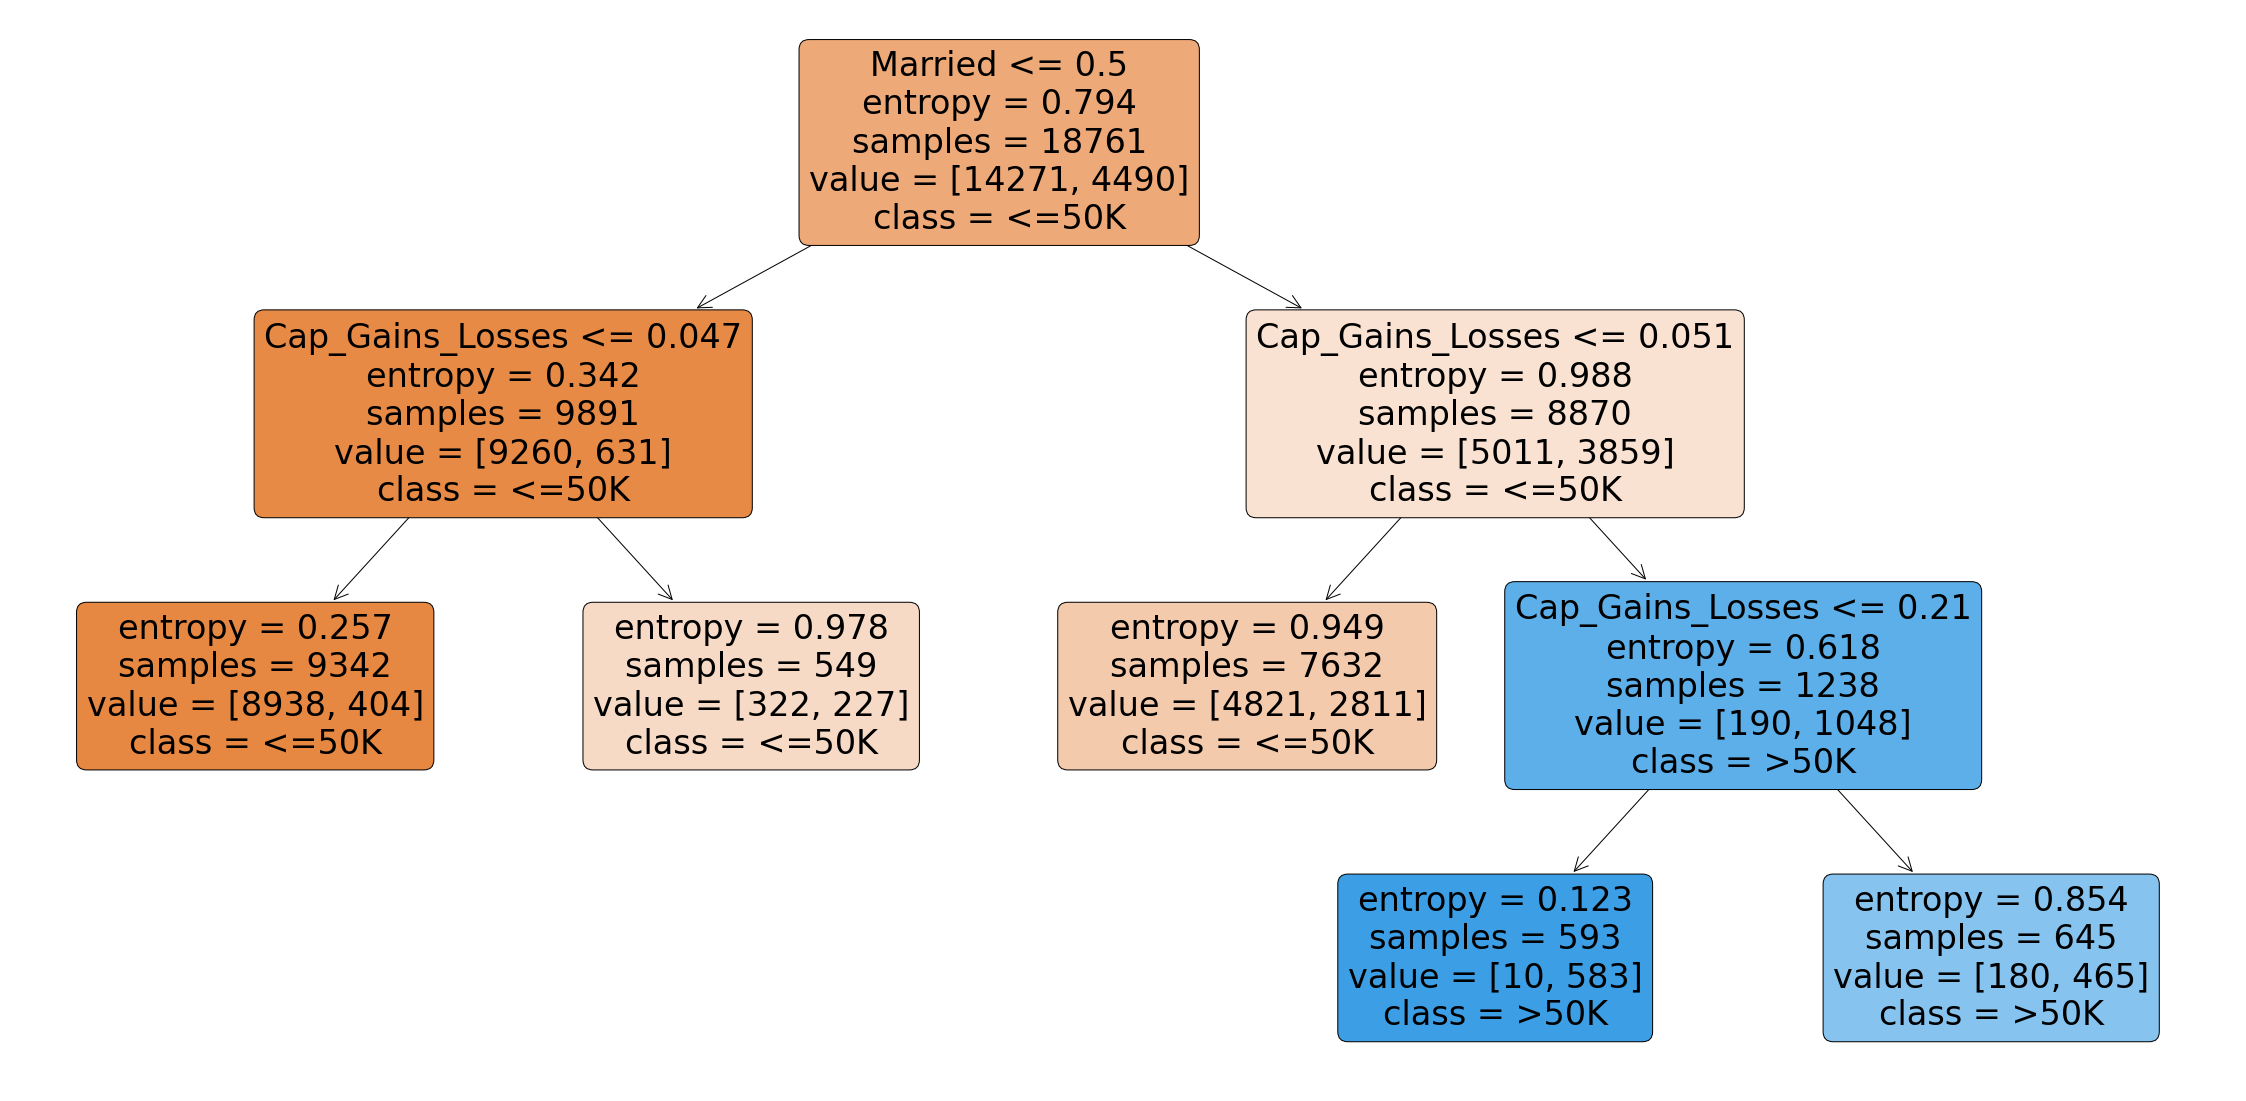

In [22]:
from sklearn.tree import plot_tree

plt.figure(figsize=(40,20))
plot_tree(dt,
          feature_names = X.columns,
          class_names=y['Income'].unique(),
          filled=True,
          rounded = True)

To obtain the classifications of the `Income` variable for every variable in the training data set, use the `predict()` command.

In [23]:
predictions = dt.predict(X)

In [24]:
predictions

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, predictions)

In [26]:
cm

array([[14081,   190],
       [ 3442,  1048]])

In [27]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

In [28]:
print('TN: ', TN,
      '\nFP: ', FP,
      '\nFN: ', FN,
      '\nTP: ', TP,)

TN:  14081 
FP:  190 
FN:  3442 
TP:  1048


### MULTIPLE REGRESSION MODELING

y = b<sub>0</sub> + b<sub>1</sub>x<sub>1</sub> + b<sub>2</sub>x<sub>2</sub> + ... + b<sub>n</sub>x<sub>n</sub> (where b<sub>0</sub> is the Intercept)

In [29]:
import statsmodels.api as sm

Next, we import the `clothing_sales_training` data sets

In [30]:
sales_train = pd.read_csv("/Users/antran/Google Drive/USD_Teaching/ADS-502/WebsiteDataSets/clothing_sales_training.csv")

For simplicity, only use 3 variables as our predictors: *Days*, *CC*, *Web*

* Days: days between purchases
* CC: Does the customer have a store credit card
* Web: Does the customer have a web account

Our predictor variable is *Sales per Visit* 

In [31]:
X = pd.DataFrame(sales_train[['Days', 'CC', 'Web']])
y = pd.DataFrame(sales_train[['Sales per Visit']])

In [32]:
sales_train

,CC,Days,Web,Sales per Visit
0,0,333.00,0,184.230000
1,0,171.50,0,38.500000
2,0,213.00,0,150.326667
3,1,71.40,1,104.240000
4,1,145.00,0,782.080000
...,...,...,...,...
1446,0,81.66,1,86.903333
1447,1,49.00,0,77.994545
1448,1,155.00,0,174.600000
1449,0,153.00,0,42.875000


Our linear regression model becomes

Sales per Visit = b<sub>0</sub> + b<sub>1</sub>(Days) + b<sub>2</sub>(CC) + b<sub>3</sub>(Web)

To have the Intercept term b<sub>0</sub> in our regression model, we need to add a constant
variable to our predictor variables.

In [33]:
X = sm.add_constant(X)

Finally, we run the multiple regression model.

In [34]:
model01 = sm.OLS(y, X).fit()

OLS stands for 'Ordinary Least Squares' which is the method used to fit this
regression model. Note that the two inputs of the `OLS()` command are the target variable `y` and the predictor variables `X`.

We save the fitted model as `model01`. To obtain the results of the regression model, run the `summary()` command on `model01`. The regression coefficients are located in the `coef` column

In [35]:
model01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Sales per Visit   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     33.93
Date:                Sun, 13 Jun 2021   Prob (F-statistic):           3.42e-21
Time:                        21:39:26   Log-Likelihood:                -8546.2
No. Observations:                1451   AIC:                         1.710e+04
Df Residuals:                    1447   BIC:                         1.712e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.3654      4.676     15.689      0.000      64.192      82.538
Days           0.1644      0.017      9.802      0.000       0.131       0.197
CC            21.8175      4.766      4.578      0.000      12.468      31.167
Web            7.2755     11.658      0.624      0.533     -15.593      30.144
==============================================================================
Omnibus:                     1312.005   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73984.329
Skew:                           3.992   Prob(JB):                         0.00
Kurtosis:                      37.059   Cond. No.                     1.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Using this model, our equation becomes:

Sales per Visit = 73.3654 + 0.1644(Days) + 21.8175(CC) + 7.2755(Web)

### Standard Error of the model

In [36]:
s = np.sqrt(model01.scale)
s

87.55982191396514

### Mean Absolute Error

In [37]:
from sklearn.metrics import mean_absolute_error

predictions = model01.predict(X)
mean_absolute_error(y_true=y, y_pred=predictions)

56.04803974413337